# Classifcation - overlapping clouds

## Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def create_data(Nclass, D, M, K):
    X1 = np.random.randn(Nclass, D) + np.array([0, -2])
    X2 = np.random.randn(Nclass, D) + np.array([2, 2])
    X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
    X = np.vstack([X1, X2, X3])

    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

    # let's see what it looks like
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()
    
    return X, Y

np.random.seed(123)

Nclass = 500
D = 2 # dimensionality of input
M = 10 # hidden layer sizes
K = 3 # number of classes

X, Y = create_data(Nclass, D, M, K)

N = len(Y)

<Figure size 640x480 with 1 Axes>

## Define model parameters

In [2]:
D = 2
K = 3
hidden_layer_sizes = [25]

## Build and train model

Accuracy: 0.38
Accuracy: 0.93
Accuracy: 0.93
Accuracy: 0.94
Accuracy: 0.95
Accuracy: 0.97
Accuracy: 0.98
Accuracy: 0.95
Accuracy: 0.95
Accuracy: 0.96


Text(0.5, 0, 'Epoch')

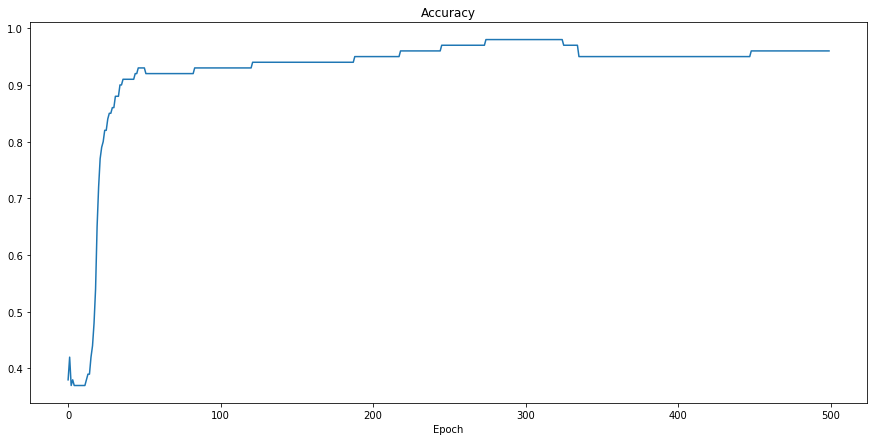

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


def indicator_matrix(Y, K):
    N = len(Y)
    T = np.zeros((N, K))
    for i in range(N):
        T[i, Y[i]] = 1
    return T

# turn Y into an indicator matrix for training
T = indicator_matrix(Y, K)

# Create placeholders for Inputs (X) and Outputs (Y)
tfX = tf.placeholder(tf.float32, shape=(None, D))
tfY = tf.placeholder(tf.float32, shape=(None, K))

# Initialize weights and biases of hidden layers
W1 = tf.Variable(tf.random_normal(shape=[D, hidden_layer_sizes[0]]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_sizes[0]]))
W2 = tf.Variable(tf.random_normal(shape=[hidden_layer_sizes[0], K]))
b2 = tf.Variable(tf.random_normal(shape=[K]))

def _forward_single_layer(X, W_in, b_in, W_out, b_out):
    """Computes forward pass for a single layer."""
    A = tf.matmul(X, W_in) + b_in
    Z = tf.nn.sigmoid(A)
    logits = tf.matmul(Z, W_out) + b_out
    return logits

# Construct the forward call across all layers except final
logits = _forward_single_layer(tfX, W1, b1, W2, b2)


def _forward_final_layer(logits, tfY):
    """Computes forward pass for final layer."""
    Out = tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=tfY, logits=logits)
    return Out

# Construct output of final layer
final_out = _forward_final_layer(logits, tfY)

# Define the cost function
cost = tf.reduce_mean(final_out)

# Define the training optmizer
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

# Define the prediction operator
predict_op = tf.argmax(logits, 1)

# Initialize session and global variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Train the model
N = 500
perf = np.zeros(N)
for i in range(N):
    # Run backprop and update weights
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    # Predict on train to show progress
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    perf[i] = np.mean(Y == pred)
    if i % (N/10) == 0:
        print('Accuracy:', perf[i])
              
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(perf)
ax.set_title('Accuracy')
ax.set_xlabel('Epoch')

# Classification - Iris setosa

## Load data

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split


iris = pd.read_csv('./data/iris-setosa.csv')
iris['species'] = pd.Categorical(iris.species)
iris['target'] = iris['species'].cat.codes
iris_train, iris_test = train_test_split(iris, test_size=.33)
X_train = iris_train[['sepal_length', 'sepal_width',
                      'petal_length', 'petal_width']].values
y_train = iris_train['target'].values
X_test = iris_test[['sepal_length', 'sepal_width',
                    'petal_length', 'petal_width']].values
y_test = iris_test['target'].values

X = X_train
Y = y_train

## Define model parameters

In [16]:
D = 4
K = 3
hidden_layer_sizes = [25]

## Build and train model

Accuracy: 0.26
Accuracy: 0.65
Accuracy: 0.97
Accuracy: 0.97
Accuracy: 0.97
Accuracy: 0.97
Accuracy: 0.98
Accuracy: 0.98
Accuracy: 0.98
Accuracy: 0.98


Text(0.5, 0, 'Epoch')

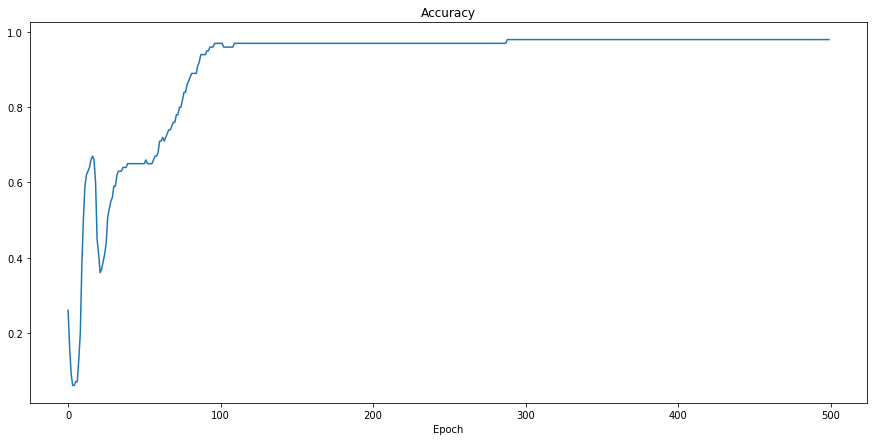

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


def indicator_matrix(Y, K):
    N = len(Y)
    T = np.zeros((N, K))
    for i in range(N):
        T[i, Y[i]] = 1
    return T

# turn Y into an indicator matrix for training
T = indicator_matrix(Y, K)

# Create placeholders for Inputs (X) and Outputs (Y)
tfX = tf.placeholder(tf.float32, shape=(None, D))
tfY = tf.placeholder(tf.float32, shape=(None, K))

# Initialize weights and biases of hidden layers
W1 = tf.Variable(tf.random_normal(shape=[D, hidden_layer_sizes[0]]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_sizes[0]]))
W2 = tf.Variable(tf.random_normal(shape=[hidden_layer_sizes[0], K]))
b2 = tf.Variable(tf.random_normal(shape=[K]))

def _forward_single_layer(X, W_in, b_in, W_out, b_out):
    """Computes forward pass for a single layer."""
    A = tf.matmul(X, W_in) + b_in
    Z = tf.nn.sigmoid(A)
    logits = tf.matmul(Z, W_out) + b_out
    return logits

# Construct the forward call across all layers except final
logits = _forward_single_layer(tfX, W1, b1, W2, b2)


def _forward_final_layer(logits, tfY):
    """Computes forward pass for final layer."""
    Out = tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=tfY, logits=logits)
    return Out

# Construct output of final layer
final_out = _forward_final_layer(logits, tfY)

# Define the cost function
cost = tf.reduce_mean(final_out)

# Define the training optmizer
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

# Define the prediction operator
predict_op = tf.argmax(logits, 1)

# Initialize session and global variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Train the model
N = 500
perf = np.zeros(N)
for i in range(N):
    # Run backprop and update weights
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    # Predict on train to show progress
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    perf[i] = np.mean(Y == pred)
    if i % (N/10) == 0:
        print('Accuracy:', perf[i])
              
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(perf)
ax.set_title('Accuracy')
ax.set_xlabel('Epoch')

# Classificaiton - MNIST

## Load data

In [2]:
import pandas as pd


mnist_train = pd.read_csv('./data/mnist-in-csv/mnist_train.csv')
mnist_test = pd.read_csv('./data/mnist-in-csv/mnist_test.csv')

X_train = mnist_train.loc[:, mnist_train.columns != 'label'].values[0:60000]
y_train = mnist_train['label'].values[0:60000]

X_test = mnist_test.loc[:, mnist_test.columns != 'label'].values[0:10000]
y_test = mnist_test['label'].values[0:10000]

X = X_train
Y = y_train

## Define model parameters

In [44]:
D = 784
K = 10
hidden_layer_sizes = [800, 200]

## Build and train model

n=0, Accuracy: 0.099
n=2, Accuracy: 0.099
n=4, Accuracy: 0.099
n=6, Accuracy: 0.099
n=8, Accuracy: 0.099
n=10, Accuracy: 0.099
n=12, Accuracy: 0.099
n=14, Accuracy: 0.099
n=16, Accuracy: 0.099
n=18, Accuracy: 0.099
Test accuracy: 0.098


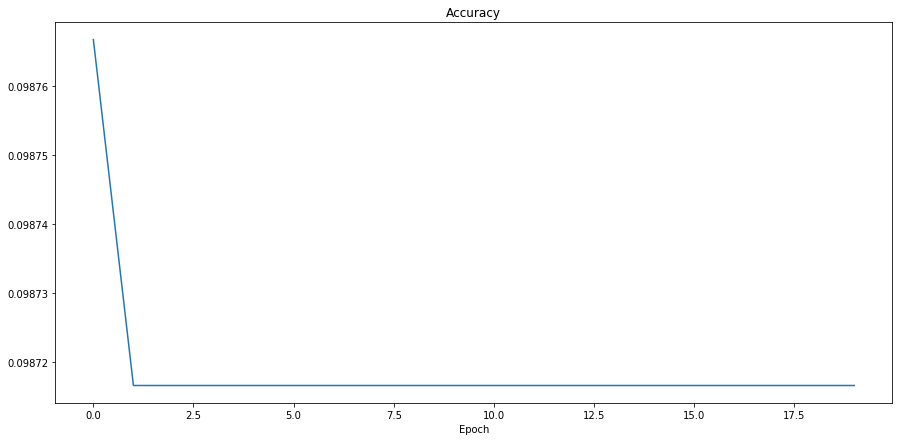

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


def indicator_matrix(Y, K):
    N = len(Y)
    T = np.zeros((N, K))
    for i in range(N):
        T[i, Y[i]] = 1
    return T

# turn Y into an indicator matrix for training
T = indicator_matrix(Y, K)

# Create placeholders for Inputs (X) and Outputs (Y)
tfX = tf.placeholder(tf.float32, shape=(None, D))
tfY = tf.placeholder(tf.float32, shape=(None, K))



# Initialize weights and biases of hidden layers
W1 = tf.Variable(tf.random_normal(shape=[D, hidden_layer_sizes[0]]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_sizes[0]]))

W2 = tf.Variable(tf.random_normal(shape=[hidden_layer_sizes[0], hidden_layer_sizes[1]]))
b2 = tf.Variable(tf.random_normal(shape=[hidden_layer_sizes[1]]))

Wf = tf.Variable(tf.random_normal(shape=[hidden_layer_sizes[1], K]))
bf = tf.Variable(tf.random_normal(shape=[K]))

def _forward_single_layer(Z_in, W_in, b_in, W_out, b_out):
    """Computes forward pass for a single layer.
    Parameters
    ----------
    Z_in : tf.tensor, shape (?, W_in.shape[0])
        Z coming in. For first layer, this is tfX.
        
    Returns
    -------
    tf.tensor, shape (?, W_out.shape[1])
    """
    A = tf.matmul(Z_in, W_in) + b_in
    Z_out = tf.nn.sigmoid(A)
    return Z_out

# Construct the forward call across all layers except final
Z0 = _forward_single_layer(tfX, W1, b1, W2, b2)
Z1 = _forward_single_layer(Z0, W2, b2, Wf, bf)


def _forward_final_layer(Z_f, Wf, bf, tfY):
    """Computes forward pass for final layer."""
    logits = tf.matmul(Z_f, Wf) + bf
    Out = tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=tfY, logits=logits)
    return Out

# Construct output of final layer
final_out = _forward_final_layer(Z1, Wf, bf, tfY)

# Define the cost function
cost = tf.reduce_mean(final_out)

# Define the training optmizer
train_op = tf.train.AdamOptimizer(0.1).minimize(cost)

# Define the prediction operator
predict_op = tf.argmax(Z1, 1)

# Initialize session and global variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Train the model
N = 20
perf = np.zeros(N)
for i in range(N):
    # Run backprop and update weights
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    # Predict on train to show progress
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    perf[i] = np.mean(Y == pred)
    if i % (N/10) == 0:
        print('n={:,}, Accuracy: {:.3f}'.format(i, perf[i]))
              
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(perf)
ax.set_title('Accuracy')
ax.set_xlabel('Epoch')

test_preds = sess.run(predict_op, feed_dict={tfX: X_test, tfY: indicator_matrix(y_test, K)})
test_acc = np.mean(y_test == test_preds)
print('Test accuracy: {:.3f}'.format(test_acc))